In [2]:
! pip install kaggle

'C:\\Users\\david\\Anaconda3'

In [17]:
! kaggle datasets download -d harperd17/mushroom-pictures-sorted


  0%|          | 0.00/55.1M [00:00<?, ?B/s]
  2%|1         | 1.00M/55.1M [00:00<00:08, 7.04MB/s]
  4%|3         | 2.00M/55.1M [00:00<00:07, 7.40MB/s]
  9%|9         | 5.00M/55.1M [00:00<00:05, 9.45MB/s]
 13%|#2        | 7.00M/55.1M [00:00<00:04, 10.2MB/s]
 16%|#6        | 9.00M/55.1M [00:00<00:04, 10.8MB/s]
 20%|#9        | 11.0M/55.1M [00:00<00:04, 11.3MB/s]
 24%|##3       | 13.0M/55.1M [00:01<00:03, 11.7MB/s]
 27%|##7       | 15.0M/55.1M [00:01<00:03, 11.9MB/s]
 31%|###       | 17.0M/55.1M [00:01<00:03, 12.0MB/s]
 34%|###4      | 19.0M/55.1M [00:01<00:03, 12.2MB/s]
 38%|###8      | 21.0M/55.1M [00:01<00:02, 12.4MB/s]
 42%|####1     | 23.0M/55.1M [00:01<00:02, 12.4MB/s]
 45%|####5     | 25.0M/55.1M [00:02<00:02, 12.5MB/s]
 49%|####9     | 27.0M/55.1M [00:02<00:02, 12.5MB/s]
 53%|#####2    | 29.0M/55.1M [00:02<00:02, 12.5MB/s]
 56%|#####6    | 31.0M/55.1M [00:02<00:02, 12.5MB/s]
 60%|#####9    | 33.0M/55.1M [00:02<00:01, 12.6MB/s]
 64%|######3   | 35.0M/55.1M [00:02<00:01, 12.6MB/s]
 

 85%|########5 | 47.0M/55.1M [00:03<00:00, 12.6MB/s]
 89%|########8 | 49.0M/55.1M [00:04<00:00, 12.6MB/s]
 93%|#########2| 51.0M/55.1M [00:04<00:00, 12.6MB/s]
 96%|#########6| 53.0M/55.1M [00:04<00:00, 12.6MB/s]
100%|#########9| 55.0M/55.1M [00:04<00:00, 12.5MB/s]
100%|##########| 55.1M/55.1M [00:04<00:00, 12.7MB/s]


In [18]:
import zipfile
import os
import pandas as pd
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Now that the file is downloaded I need to unzip it and load it to 'mushroom_files' file
zip_ref = zipfile.ZipFile('mushroom-pictures-sorted.zip', 'r')
zip_ref.extractall('mushroom_files')
zip_ref.close()

# Types of Mushrooms and How Many Pictures of Each

In [31]:
mushroom_species = os.listdir('mushroom_files/All_Mushroom_Data_Cleaned')

In [32]:
counts = []
for mushroom in mushroom_species:
    picture_names = os.listdir('mushroom_files/All_Mushroom_Data/'+mushroom)
    counts.append(len(picture_names))

In [33]:
picture_info = pd.DataFrame({'Species':mushroom_species,'Number of Pictures':counts})
print('Information on mushroom species in this data set is as follows:')
picture_info

Information on mushroom species in this data set is as follows:


Species  Number of Pictures
0  Amanita bisporigera                 606
1     Amanita muscaria                 367
2       Boletus edulis                 444
3         Cantharellus                1183
4  Omphalotus olearius                  59
5       Russula mariae                 235

There are not a ton of images per species, especially for species like 'Agaricus', 'Entoloma', 'Hygrocybe', and 'Suillus'. This may strongly impact how well the deep learning models can classify these mushroom species.

# Show what these mushroom images look like

First of all, when inspecting the images in file explorer, I noticed that some pictures did not contain mushrooms in them, and some pictures contained microscope images of a mushroom. Examples are shown below. I removed pictures like this because they will only confuse the model, and in practice, these pictures will never be fed into the model.

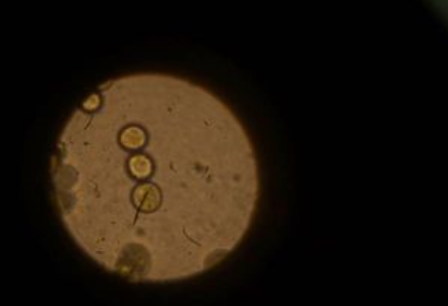

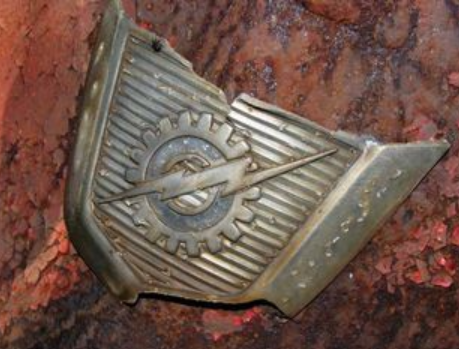

## Remaining Pictures Counts

In [30]:
mushroom_species = os.listdir('mushroom_files/All_Mushroom_Data_Cleaned')
counts = []
for mushroom in mushroom_species:
    picture_names = os.listdir('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom)
    counts.append(len(picture_names))
picture_info = pd.DataFrame({'Species':mushroom_species,'Number of Pictures':counts})
print('Information on mushroom species in this data set is as follows:')
picture_info

Information on mushroom species in this data set is as follows:


Species  Number of Pictures
0  Amanita bisporigera                 589
1     Amanita muscaria                 361
2       Boletus edulis                 436
3         Cantharellus                1145
4  Omphalotus olearius                  59
5       Russula mariae                 228

## Samples of Remaining Pictures

In [35]:
file_names = []
for mushroom in mushroom_species:
    file_names.append(os.listdir('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom))

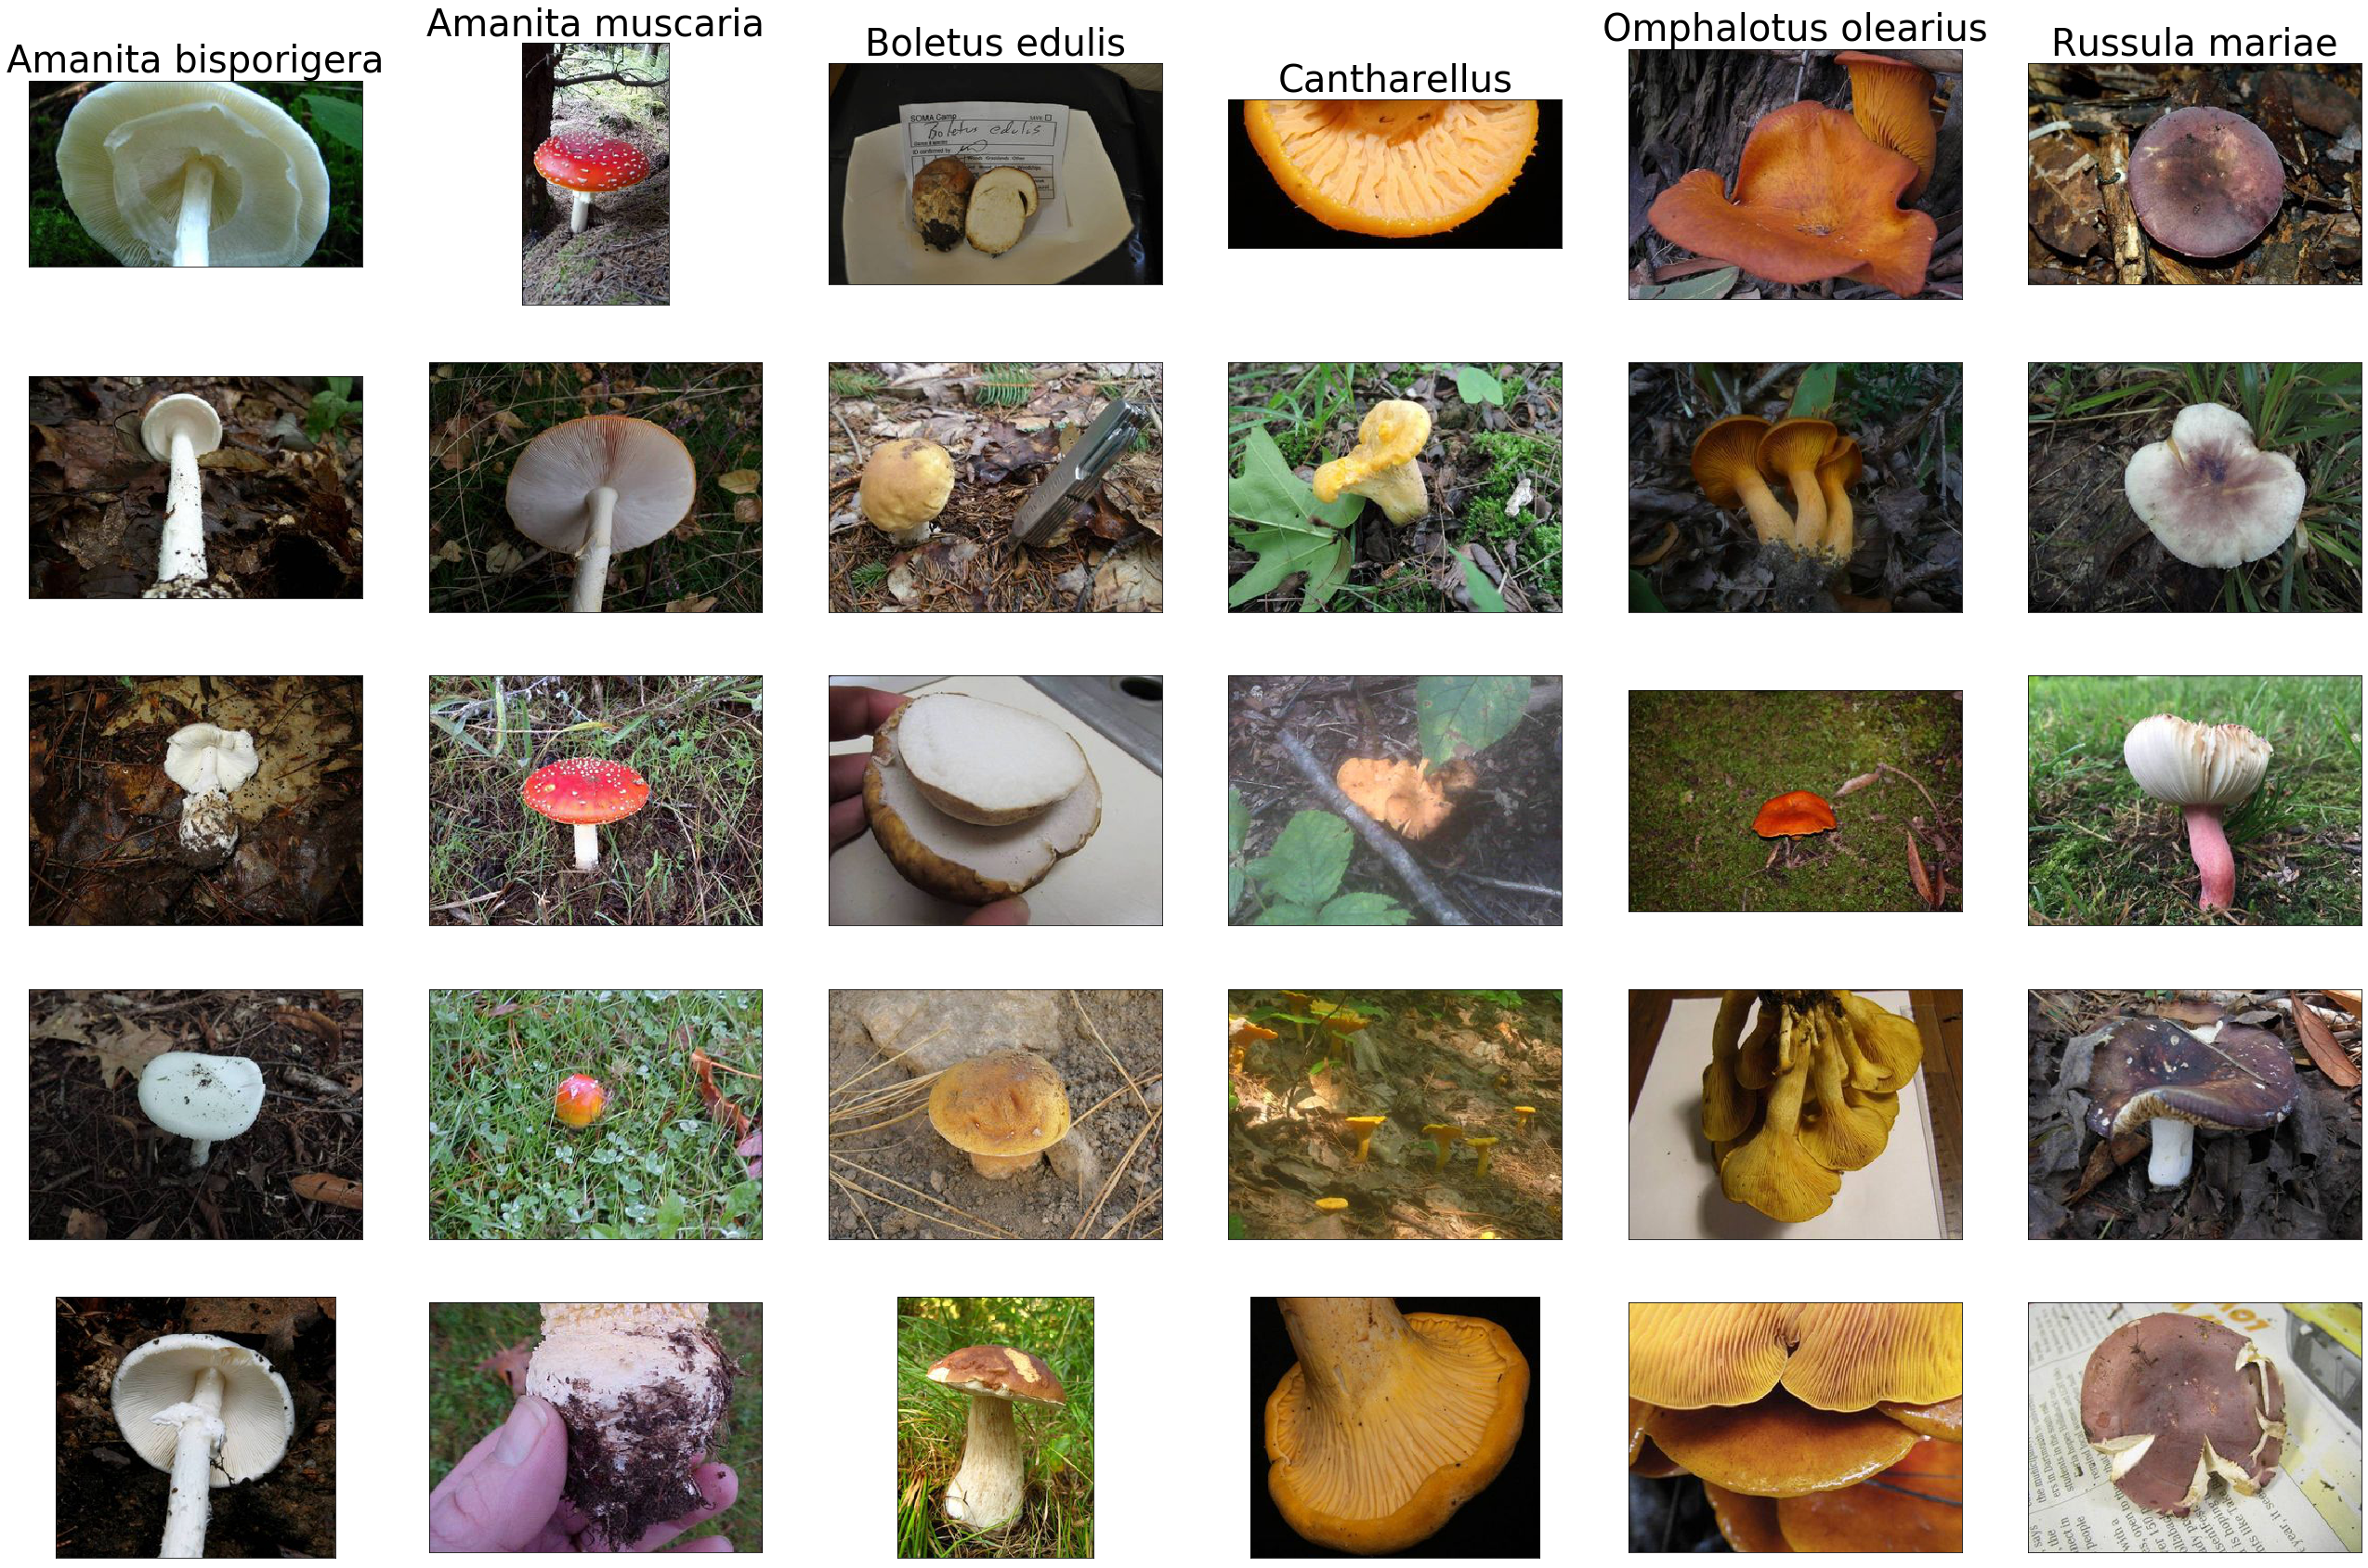

In [114]:
num1 = 5
num2 = 1
figs = []
axes = []
fig, ax = plt.subplots(num1*num2,len(mushroom_species))
for i in range(len(mushroom_species)):
    chosen_files = random.sample(file_names[i],num1*num2)
    for j in range(num1*num2):
        img = Image.open('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom_species[i]+'/'+chosen_files[j])
        ax[j,i].imshow(img)
        if j == 0:
            ax[j,i].set_title(mushroom_species[i],fontsize=40)
        plt.imshow(img)
        ax[j,i].axes.xaxis.set_visible(False)
        ax[j,i].axes.yaxis.set_visible(False)
fig.set_size_inches((45,30))

It is interesting to note that many of these pictures have multiple mushrooms in them as well as different mushrooms showcasing different parts. For example, some mushroom pictures are taken from above and other pictures are take from the side while other pictures are taken from below to showcase the underside of the mushroom cap. Lastly, some pictures are of a mushroom that has been cut vertically in half. This is probably because the flesh from some mushrooms changes colors when cut, or sometimes cutting the mushroom in half exposed a crucial structure to the mushroom for identification.

# Information on the Image Sizes

In [36]:
image_heights = []
image_widths = []
ratios = []
for i in range(len(file_names)):
    height_line = []
    width_line = []
    ratio_line = []
    for j in file_names[i]:
        try:
            img = Image.open('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom_species[i]+'/'+j)
            width_line.append(list(img.size)[0])
            height_line.append(list(img.size)[1])
            ratio_line.append(list(img.size)[1]/list(img.size)[0])
        except:
            print(mushroom_species[i])
            print(j)
            continue
    image_heights.append(height_line)
    image_widths.append(width_line)
    ratios.append(ratio_line)
    
description = []
for i in range(len(image_heights)):
    description.append([[min(image_heights[i]),min(image_widths[i])],
                        [int(sum(image_heights[i])/len(image_heights[i])),int(sum(image_widths[i])/len(image_widths[i]))],
                       [max(image_heights[i]),max(image_widths[i])],
                       round(pd.Series(ratios[i]).quantile(.5),2)])

column_labels = []
for sp in mushroom_species:
    column_labels.append(sp+' Height, Width')
index_labels = ['Minimum','Average','Maximum','Median Height to Width Ratio']

description2 = []
for i in range(4):
    l = []
    for j in range(len(description)):
        l.append(description[j][i])
    description2.append(l)
    
description_df = pd.DataFrame(description2,columns=column_labels, index=index_labels)

print("Description of Image Sizes by Mushroom Species is as follows:")
description_df

Description of Image Sizes by Mushroom Species is as follows:


Amanita bisporigera Height, Width  \
Minimum                                             [149, 150]   
Average                                             [259, 291]   
Maximum                                             [320, 320]   
Median Height to Width Ratio                              0.75   

                             Amanita muscaria Height, Width  \
Minimum                                          [173, 179]   
Average                                          [264, 290]   
Maximum                                          [320, 320]   
Median Height to Width Ratio                           0.75   

                             Boletus edulis Height, Width  \
Minimum                                        [181, 172]   
Average                                        [254, 305]   
Maximum                                        [320, 320]   
Median Height to Width Ratio                         0.75   

                             Cantharellus Height, Width  \
Minimum                                      [114, 133]   
Average                                      [243, 307]   
Maximum                                      [320, 320]   
Median Height to Width Ratio                       0.75   

                             Omphalotus olearius Height, Width  \
Minimum                                             [180, 213]   
Average                                             [237, 306]   
Maximum                                             [320, 320]   
Median Height to Width Ratio                              0.75   

                             Russula mariae Height, Width  
Minimum                                        [140, 212]  
Average                                        [247, 310]  
Maximum                                        [320, 320]  
Median Height to Width Ratio                         0.75

For the most part, an images height is roughly 75% of its width. On average, the images are about 250 pixels tall and 300 pixels wide. The images vary greatly in size, with the smallest image being about 45% of the size of an average image. The largest image is about 28% larger than an average image. When determing what size the images should be when fed into the convolutional neural network models later on, I would like to keep in mind how the smaller and larger images will look when resized, as well as their natural width to height ratios.

In order to save on computation time, I would like to try casting images to a height of 187 pixels and a width of 250 pixels, which is below the average image size.

### Testing out size on small image

In [94]:
img = Image.open('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom_species[3]+'/'+'49988.jpg')

In [95]:
img.size

(160, 160)

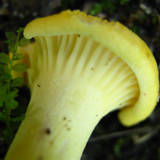

In [96]:
img

In [97]:
img2 = img.resize((250,187))

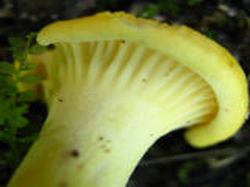

In [98]:
img2

### Testing out sizing on large image

In [102]:
img = Image.open('mushroom_files/All_Mushroom_Data_Cleaned/'+mushroom_species[1]+'/'+'84218.jpg')

In [103]:
img.size

(320, 213)

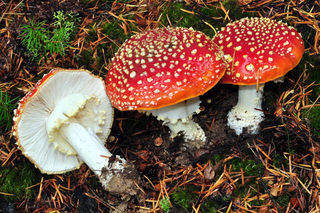

In [104]:
img

In [105]:
img2 = img.resize((250,187))

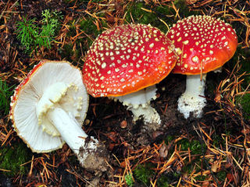

In [106]:
img2

This image resizing size looks good to me. It isn't so large that small pictures lose the detail in the mushrooms, and it isn't so small that large pictures get their features smushed. In particular, I am looking at the structures underneath the mushrooms (like pores, gills, ridge) as well as stem structure. I am looking at these section because I know from mushroom harvesting experience that these are often important in classifying a mushroom.

## Selecting a photo and resizing for the report

In [109]:
img = Image.open('mushroom_files/All_Mushroom_Data_Cleaned/Amanita muscaria/57049.jpg')

In [110]:
img2 = img.resize((600,400))

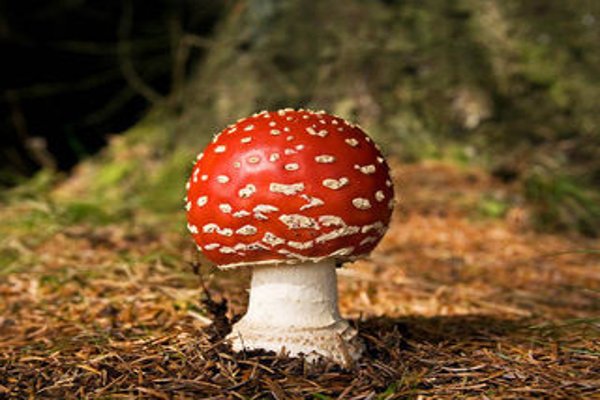

In [111]:
img2

In [112]:
img2.save(r'C:\Users\david\Desktop\UMBC\DATA602\Projects\Final Project Ideas\Mushroom_ID\Report_Image_Sized_Amanita.jpg')